# TASK 1

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%pip install alpha_vantage

In [11]:
import yfinance as yf
import random
import pandas as pd
import requests

# Load the S&P 500 table from Wikipedia
url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
tables = pd.read_html(url)
sp500_table = tables[0]

# Group the table by the 'GICS Sector' column
grouped = sp500_table.groupby('GICS Sector')

# Initialize an empty list to store selected tickers
selected_tickers = []

# Number of companies to select from each sector
n_companies = 4

# Randomly select n_companies from each sector
for name, group in grouped:
    tickers = group['Symbol'].tolist()
    selected = random.sample(tickers, min(n_companies, len(tickers)))
    selected_tickers.extend(selected)

# If less than 40 tickers were selected, add more from any sector until we reach 40
while len(selected_tickers) < 40:
    additional_ticker = random.choice(sp500_table['Symbol'].tolist())
    if additional_ticker not in selected_tickers:
        selected_tickers.append(additional_ticker)

# Show the selected tickers
print("Selected 40 tickers:", selected_tickers)

# Initialize an empty DataFrame to store stock data
stock_data = pd.DataFrame()

# Fetch historical data for each stock and add it to the DataFrame
for ticker in selected_tickers:
    stock = yf.Ticker(ticker)
    hist_data = stock.history(period="5y")['Close']
    stock_data[ticker] = hist_data

# Initialize a DataFrame to store financial ratios
financial_ratios = pd.DataFrame()

# Fetch key financial ratios for each selected ticker
for ticker in selected_tickers:
    try:
        stock = yf.Ticker(ticker)
        ratios_df = stock.info
        financial_ratios[ticker] = ratios_df
    except requests.exceptions.HTTPError:
        print(f"Failed to fetch data for {ticker}")
        continue

# Convert the dictionary to a DataFrame
financial_ratios_df = pd.DataFrame(financial_ratios)



Selected 40 tickers: ['TTWO', 'DIS', 'T', 'NWS', 'DRI', 'F', 'PHM', 'NKE', 'EL', 'MO', 'KO', 'SYY', 'OXY', 'CVX', 'OKE', 'WMB', 'BK', 'JKHY', 'GPN', 'BEN', 'BSX', 'LH', 'BIIB', 'REGN', 'JCI', 'AAL', 'AME', 'FDX', 'ON', 'ORCL', 'SNPS', 'INTC', 'IFF', 'NEM', 'SHW', 'LIN', 'ARE', 'AVB', 'FRT', 'KIM', 'D', 'DUK', 'XEL', 'AES']
Failed to fetch data for TTWO
Failed to fetch data for DIS
Failed to fetch data for T
Failed to fetch data for NWS
Failed to fetch data for DRI
Failed to fetch data for F
Failed to fetch data for PHM
Failed to fetch data for NKE
Failed to fetch data for EL
Failed to fetch data for MO
Failed to fetch data for KO
Failed to fetch data for SYY
Failed to fetch data for OXY
Failed to fetch data for CVX
Failed to fetch data for OKE
Failed to fetch data for WMB
Failed to fetch data for BK
Failed to fetch data for JKHY
Failed to fetch data for GPN
Failed to fetch data for BEN
Failed to fetch data for BSX
Failed to fetch data for LH
Failed to fetch data for BIIB
Failed to fetc

# Task 2

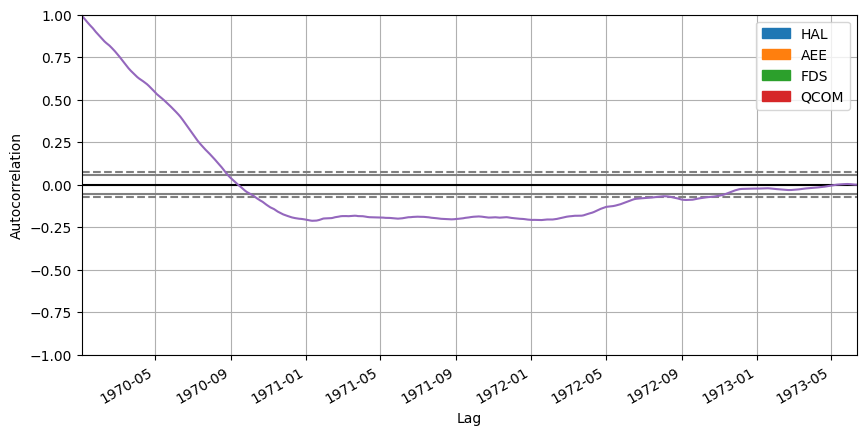

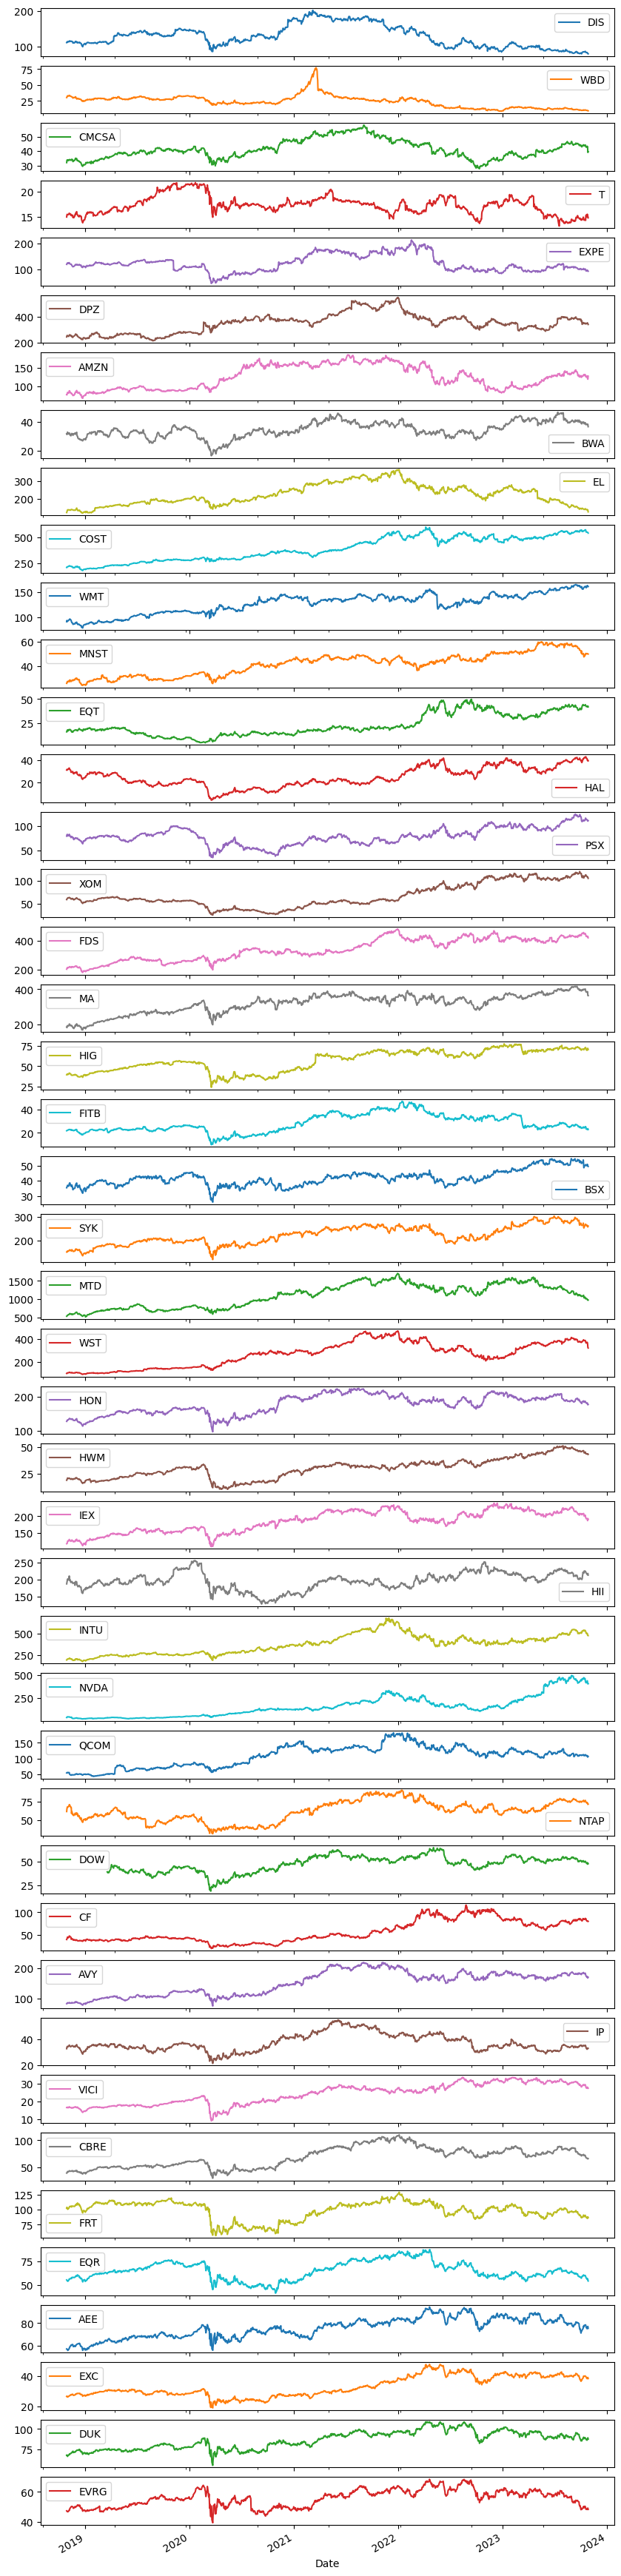

In [ ]:
# Task 2: Data Cleaning and Preparation

import yfinance as yf
import pandas as pd
import numpy as np

# Initialize an empty DataFrame to store stock data
stock_data = pd.DataFrame()

# Fetch historical data for each stock and add it to the DataFrame
for ticker in selected_tickers:
    stock = yf.Ticker(ticker)
    hist_data = stock.history(period="5y")['Close']
    stock_data[ticker] = hist_data

stock_data_for_export = stock_data.reset_index()
stock_data_for_export["Date"] = stock_data_for_export["Date"].dt.tz_localize(None)
stock_data_for_export.to_excel('/content/drive/MyDrive/5_year_stock_data.xlsx', sheet_name="raw_data")


# Randomly select 4 tickers from the tickers selected in Task 1
random_tickers = random.sample(selected_tickers, 4)

# Plot the data for the randomly selected tickers
stock_data.plot.area(y=random_tickers, figsize=(10, 5))

from pandas.plotting import autocorrelation_plot

random_ticker = random.sample(selected_tickers, 1)

autocorrelation_plot(stock_data[random_ticker])

stock_data.plot(subplots=True, figsize=(10,50))

# 1. Inspect the data for missing values, outliers, or anomalies. Handle them appropriately (e.g., imputation, removal).
stock_data_cleaned = stock_data.dropna()  # Removes rows with missing values
financial_ratios_cleaned = financial_ratios.dropna()  # Removes rows with missing values

# 2. Verify the integrity of the data by checking for duplicate entries, inconsistent time frames, or any other data integrity issues.
stock_data_cleaned = stock_data_cleaned[~stock_data_cleaned.duplicated()]  # Removes duplicate rows

# Convert lists to strings to make them hashable
financial_ratios_cleaned = financial_ratios_cleaned.applymap(str)

# Remove duplicate rows
financial_ratios_cleaned = financial_ratios_cleaned[~financial_ratios_cleaned.duplicated()]

# 3. Calculate monthly and annual returns for each stock.
monthly_returns = stock_data_cleaned.pct_change().resample('M').sum()
annual_returns = stock_data_cleaned.pct_change().resample('A').sum()

# 4. Normalize the stock prices to compare the performance of different stocks on a similar scale.
stock_data_normalized = stock_data_cleaned / stock_data_cleaned.iloc[0]

# 5. Create two separate DataFrames:
# • One that consolidates all the monthly returns.
# • Another that consolidates all the financial ratios.
monthly_returns_df = pd.DataFrame(monthly_returns)
financial_ratios_df = pd.DataFrame(financial_ratios_cleaned)

# 6. Calculate technical indicators for each stock
technical_indicators = pd.DataFrame()

for ticker in selected_tickers:
    # Calculate Moving Average
    moving_average = stock_data_cleaned[ticker].rolling(window=5).mean()

    # Calculate Volatility
    volatility = stock_data_cleaned[ticker].pct_change().rolling(window=5).std()

    # Calculate Momentum
    momentum = stock_data_cleaned[ticker].pct_change().rolling(window=5).mean()

    # Combine the indicators into a single DataFrame
    indicators = pd.concat([moving_average, volatility, momentum], axis=1)
    indicators.columns = [f"{ticker}_Moving Average", f"{ticker}_Volatility", f"{ticker}_Momentum"]

    # Concatenate the indicators with the existing technical_indicators DataFrame
    technical_indicators = pd.concat([technical_indicators, indicators], axis=1)

# Add the technical indicators to the cleaned stock data DataFrame
stock_data_cleaned = pd.concat([stock_data_cleaned, technical_indicators], axis=1)





In [12]:
stock_data.sample(10)

,TTWO,DIS,T,NWS,DRI,F,PHM,NKE,EL,MO,...,SHW,LIN,ARE,AVB,FRT,KIM,D,DUK,XEL,AES
Date,,,,,,,,,,,,,,,,,,,,,
2019-06-21 00:00:00-04:00,112.639999,138.536896,17.129292,13.201996,107.706062,8.432972,30.317307,82.195892,174.451828,34.198132,...,149.455688,189.166870,126.977371,178.098541,112.324089,15.536708,65.863762,75.297241,54.619850,14.821860
2019-05-23 00:00:00-04:00,104.379997,131.127472,16.965652,11.381031,107.288513,8.314795,29.920002,78.994911,158.851257,37.041626,...,138.184494,172.383972,125.902359,174.618835,110.145012,14.805081,64.835503,74.767410,52.088490,14.848394
2019-06-19 00:00:00-04:00,111.019997,139.218582,17.108175,13.012313,104.312225,8.475180,30.611925,80.087082,173.018204,35.551815,...,149.234268,187.725601,130.709442,179.289841,112.785767,15.684673,64.871811,73.716125,53.971947,14.653832
2022-08-24 00:00:00-04:00,123.300003,116.410004,16.581806,17.526991,122.345619,14.116690,41.488155,109.705788,261.313751,41.172832,...,237.125259,287.820374,151.511108,200.289764,100.490456,20.873022,79.524857,106.375870,72.553574,24.888054
2020-08-20 00:00:00-04:00,174.429993,128.119995,17.339319,14.644431,73.525536,6.057576,44.610168,104.620651,192.134125,33.716217,...,216.622086,233.823608,155.018509,137.449097,70.201401,10.200661,68.304054,71.956184,62.860481,16.562258
2019-07-25 00:00:00-04:00,119.250000,142.357101,18.206127,12.955409,110.581413,8.190443,30.279291,83.662491,182.370529,35.330944,...,163.451645,187.070480,125.943718,178.633301,109.201668,15.558710,62.929966,72.740524,53.421658,14.954517
2022-11-30 00:00:00-05:00,105.690002,97.870003,18.066378,19.237360,142.141037,12.775326,44.305912,108.322350,233.379547,42.810547,...,247.294525,331.757446,149.201752,168.271866,106.319641,21.868696,58.116203,96.820984,68.002167,28.317804
2023-03-29 00:00:00-04:00,116.669998,96.870003,18.061094,16.981237,150.809235,11.773202,56.910252,119.693230,242.789352,42.650536,...,214.271942,347.321228,118.966934,157.608917,91.718712,18.146181,54.101505,94.228912,65.401581,23.116575
2023-04-13 00:00:00-04:00,122.010002,100.839996,19.242743,17.707869,150.831573,12.173783,58.961609,125.593948,249.607666,43.081642,...,226.342880,359.466980,116.740334,166.954514,94.924911,18.370571,56.807552,97.038071,69.824600,25.166126


# Task 3

In [ ]:
%pip install alpha_vantage

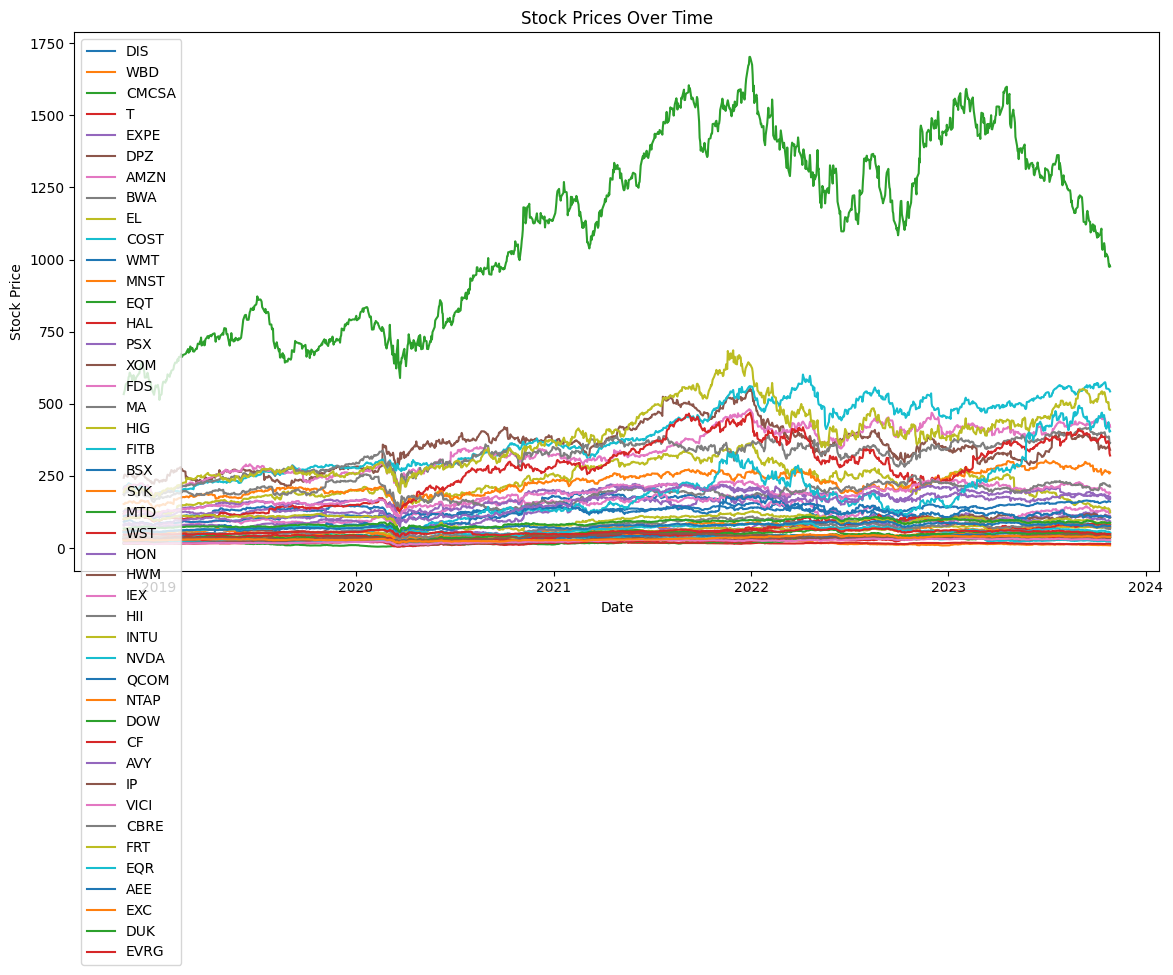

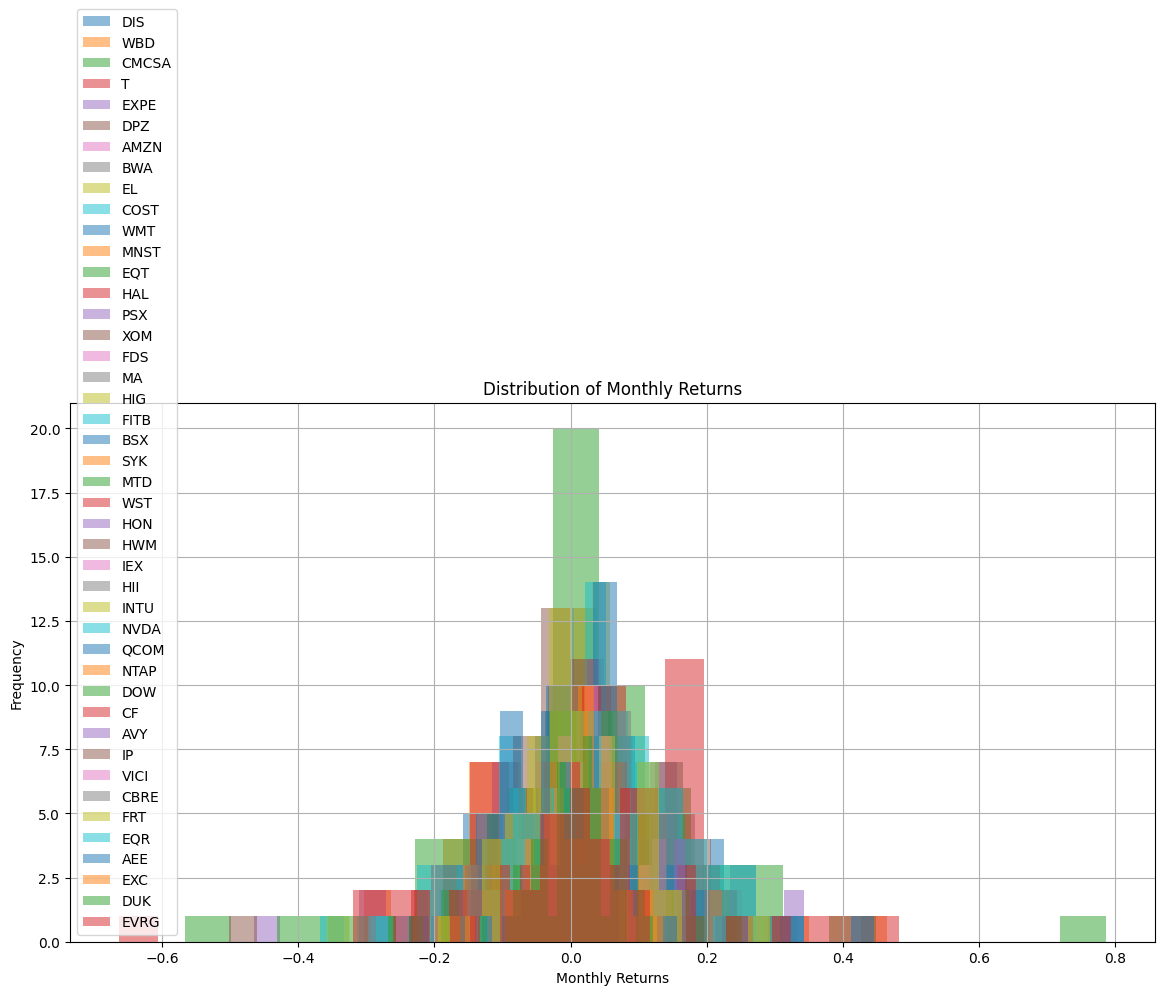

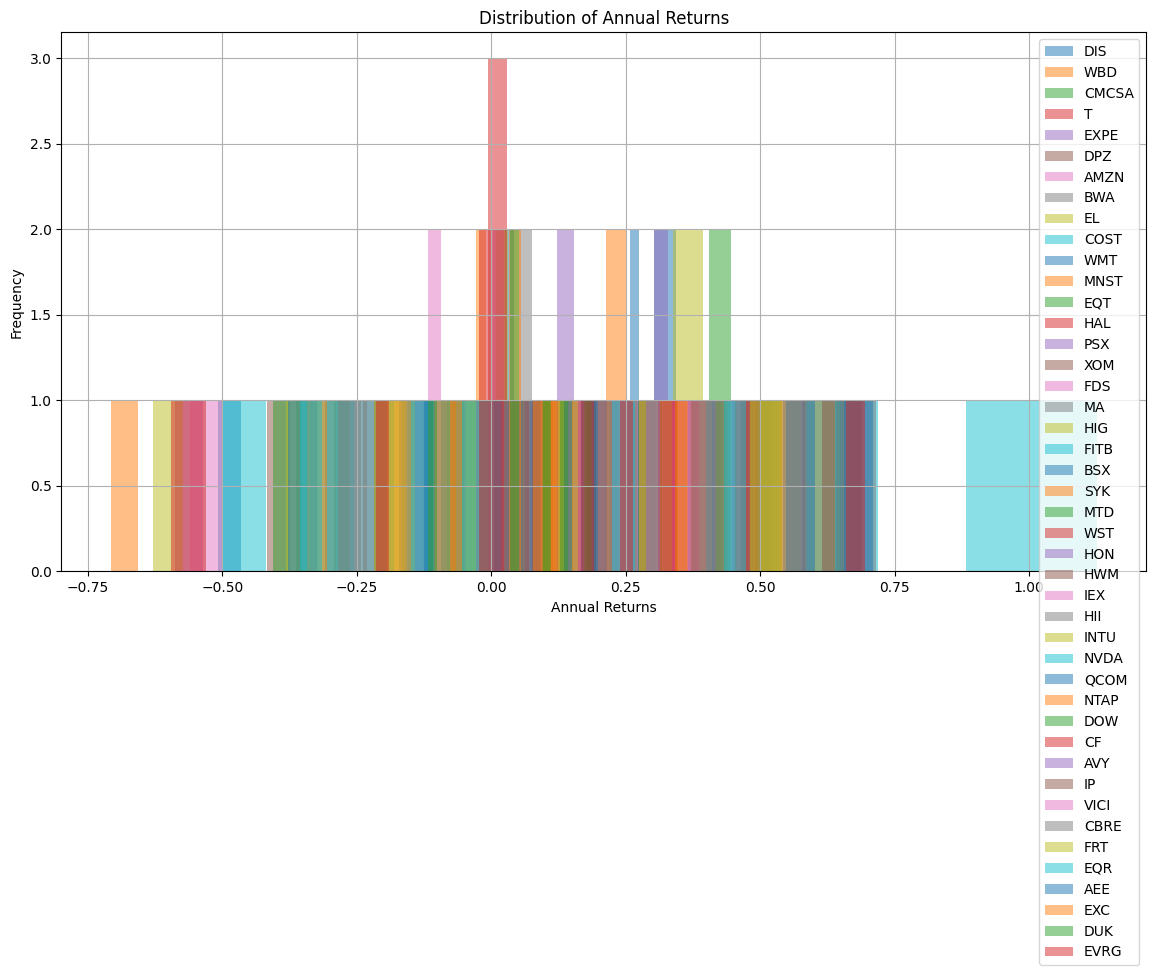

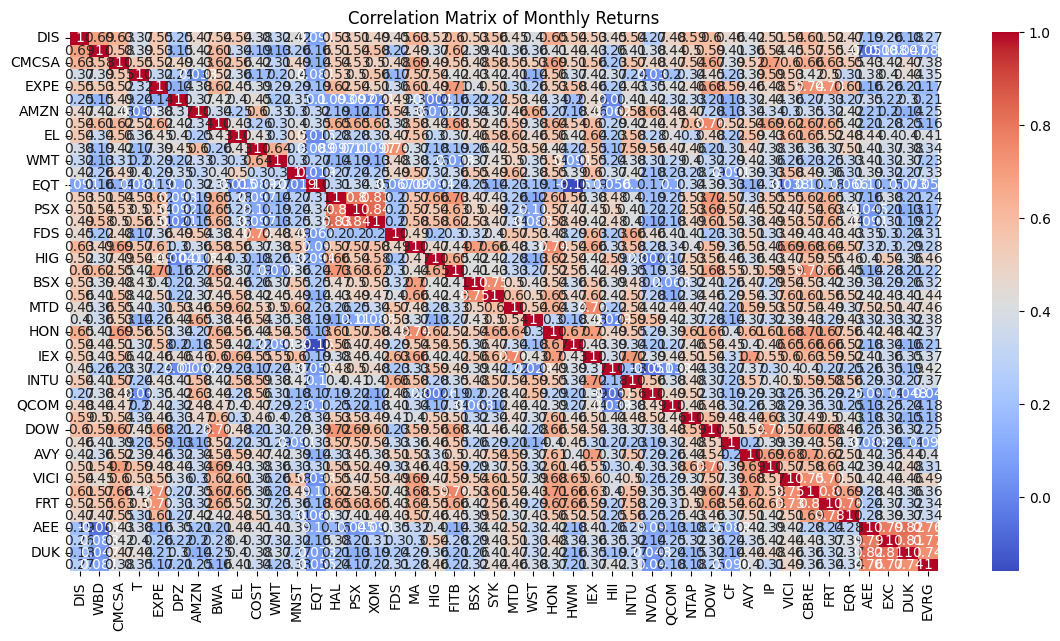

In [ ]:
import pandas as pd
import random
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

# Use the selected tickers from Task 1
companies = selected_tickers

# Initialize DataFrames to store stock data
stock_data = pd.DataFrame()

# Fetch historical data for each stock and add it to the DataFrame
for ticker in companies:
    stock = yf.Ticker(ticker)
    hist_data = stock.history(period="5y")['Close']
    stock_data[ticker] = hist_data

# Task 3: Exploratory Data Analysis (EDA)

# 1. Create visualizations to understand the trends in stock prices
plt.figure(figsize=(14, 7))
for company in companies:
    plt.plot(stock_data[company], label=company)
plt.title('Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# 2. Analyze the distribution of monthly and annual returns
# Calculate monthly and annual returns for each stock
monthly_returns = stock_data.pct_change().resample('M').sum()
annual_returns = stock_data.pct_change().resample('A').sum()

plt.figure(figsize=(14, 7))
for company in companies:
    monthly_returns[company].dropna().hist(bins=20, alpha=0.5, label=company)
plt.title('Distribution of Monthly Returns')
plt.xlabel('Monthly Returns')
plt.ylabel('Frequency')
plt.legend()
plt.show()

plt.figure(figsize=(14, 7))
for company in companies:
    annual_returns[company].dropna().hist(bins=20, alpha=0.5, label=company)
plt.title('Distribution of Annual Returns')
plt.xlabel('Annual Returns')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# 3. Create correlation matrices to identify relationships between different stocks
correlation_matrix = monthly_returns.corr()
plt.figure(figsize=(14, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Monthly Returns')
plt.show()


# Task 4

In [ ]:
%pip install PyPortfolioOpt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 1.5 MB/s eta 0:00:00


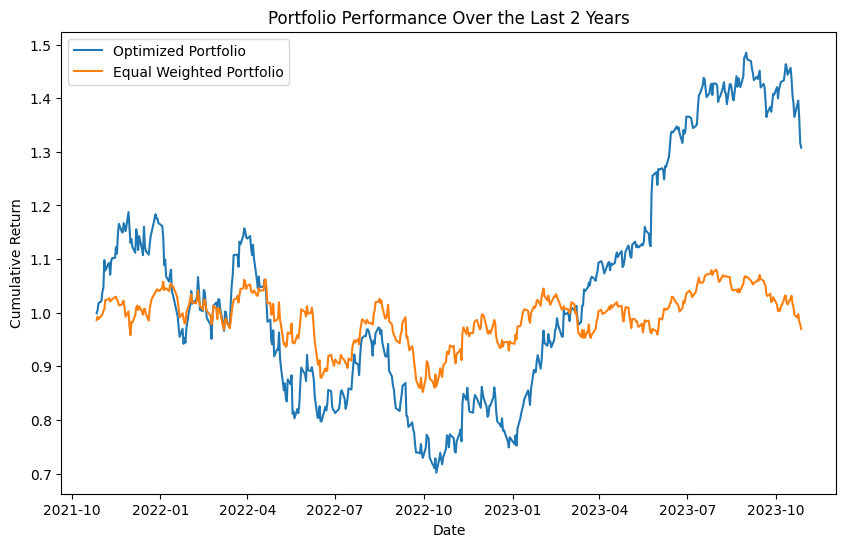

In [ ]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
import numpy as np
import matplotlib.pyplot as plt

# Task 4: Portfolio Construction

# 1. Use mean-variance optimization to construct a portfolio
# Calculate the expected returns and the annual sample covariance matrix of asset returns
mu = expected_returns.mean_historical_return(stock_data)
S = risk_models.sample_cov(stock_data)

# Optimize for the maximum Sharpe ratio
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()

# Convert the dictionary of weights to a NumPy array
weights_array = np.array(list(weights.values()))

# 2. Alternatively, apply your own strategy to select a combination of stocks
# In this example, we'll use an equally weighted strategy
n = len(companies)
equal_weights = np.repeat(1/n, n)

# 3. Backtest the portfolio performance over the last 2 years
# Using the weights from the mean-variance optimization
optimized_portfolio = stock_data.pct_change().iloc[-504:] @ weights_array

# Using the equally weighted strategy
equal_weighted_portfolio = stock_data.pct_change().iloc[-504:] @ equal_weights

# Plot the portfolio performance
plt.figure(figsize=(10, 6))
plt.plot((1 + optimized_portfolio).cumprod(), label='Optimized Portfolio')
plt.plot((1 + equal_weighted_portfolio).cumprod(), label='Equal Weighted Portfolio')
plt.title('Portfolio Performance Over the Last 2 Years')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.show()



# Task 5

In [ ]:
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt import get_latest_prices
import numpy as np

# Task 5: Risk Assessment

# 1. Calculate the portfolio's Sharpe Ratio, Beta, and Value at Risk (VaR)
# Calculate the expected returns and the annual sample covariance matrix of asset returns
mu = expected_returns.mean_historical_return(stock_data)
S = risk_models.sample_cov(stock_data)

# Calculate the expected annual return and volatility of the optimized portfolio
expected_annual_return = (mu @ weights_array) * 252
volatility = np.sqrt(weights_array @ S @ weights_array) * np.sqrt(252)

# Calculate the Sharpe ratio (assuming a risk-free rate of 0)
sharpe_ratio = expected_annual_return / volatility

# Calculate the Beta of the portfolio
market_data = yf.download('^GSPC', start='2017-01-01', end='2022-01-01')['Adj Close']
market_returns = market_data.pct_change()
cov_matrix = np.cov(stock_data.pct_change().iloc[-504:].fillna(0).values, market_returns.iloc[-504:].fillna(0).values, rowvar=False)
beta = cov_matrix[0, 1] / cov_matrix[1, 1]

# Calculate the 5% daily VaR
var_5 = np.percentile(stock_data.pct_change().iloc[-504:].fillna(0).values, 5)

# 2. Provide your interpretation of these risk metrics
print("Expected Annual Return:", expected_annual_return)
print("Volatility:", volatility)
print("Sharpe Ratio:", sharpe_ratio)
print("Beta:", beta)
print("5% Daily VaR:", var_5)



[*********************100%%**********************]  1 of 1 completed
Expected Annual Return: 86.0261378982396
Volatility: 4.723352637289273
Sharpe Ratio: 18.21293993996813
Beta: 0.3189048160663317
5% Daily VaR: -0.03296305358824261


# Task Bonus

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np

# 1. Train a machine learning model to predict future monthly returns based on historical data and financial ratios
# Prepare the data
monthly_returns = stock_data.pct_change().resample('M').sum()
X = monthly_returns.iloc[:-1]
y = monthly_returns.iloc[1:]

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# 2. Evaluate the model's performance and discuss its reliability in making future predictions
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the mean squared error and R^2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


Mean Squared Error: 0.11226598449045098
R^2 Score: -19.448330605087357
